In [1]:
from pprint import pprint
import json

filePath = "2022.json"

with open(filePath, "r") as file:
    jsondata = file.read()
    data = json.loads(jsondata)
pprint(data)

{'00Blm7zeNqgYLPtW6zg8cj': ['One Right Now-Post Malone & The Weeknd',
                            [0.687,
                             0.781,
                             -4.806,
                             1,
                             0.053,
                             0.0361,
                             0,
                             0.0755,
                             0.688,
                             97.014]],
 '00imgaPlYRrMGn9o83hfmk': ['Loose Change-Brent Faiyaz',
                            [0.574,
                             0.369,
                             -8.931,
                             0,
                             0.0814,
                             0.753,
                             0,
                             0.147,
                             0.44,
                             84.975]],
 '01XvpCU5TnYXaNFrrwm1We': ['War-King Von',
                            [0.915,
                             0.538,
                             -5.954,
      

In [2]:
features = {}
for key, value in data.items():
    features[value[0]] = value[1]
    
pprint(features)

{"'Til You Can't-Cody Johnson": [0.501,
                                 0.815,
                                 -4.865,
                                 1,
                                 0.0436,
                                 0.0513,
                                 0,
                                 0.106,
                                 0.46,
                                 160.087],
 "(There's No Place Like) Home For The Holidays (1959)-Perry Como With Mitchell Ayers And His Orchestra": [0.532,
                                                                                                           0.401,
                                                                                                           -10.629,
                                                                                                           1,
                                                                                                           0.0525,
                                  

In [3]:
import billboard
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd

cid = "8494dc579e694b9a91d1728fe3be9b96"
secret = "d571c3a3139849a68734f206590794fa"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
from datetime import datetime, timedelta
curdate = datetime.now()

yearchartarr = []
curday = datetime(2022, 1, 1)
while (curday.year == 2022):
    dayformat = curday.strftime('%Y-%m-%d')
    charts = billboard.ChartData('hot-100', date=dayformat)
    curday += timedelta(weeks=1)
    dayarr = []
    for song in charts:
        arr = [dayformat, song.title, song.artist, song.rank, []]
        dayarr.append(arr)
    yearchartarr.append(dayarr)

In [81]:
yearchart = np.array(yearchartarr, dtype=object)
pprint(yearchart)
yearchart.shape

array([[['2022-01-01', 'All I Want For Christmas Is You',
         'Mariah Carey', 1, list([])],
        ['2022-01-01', "Rockin' Around The Christmas Tree",
         'Brenda Lee', 2, list([])],
        ['2022-01-01', 'Jingle Bell Rock', 'Bobby Helms', 3, list([])],
        ...,
        ['2022-01-01', 'No Love', 'Summer Walker & SZA', 98, list([])],
        ['2022-01-01', 'Knowing You', 'Kenny Chesney', 99, list([])],
        ['2022-01-01', 'Family Ties', 'Baby Keem & Kendrick Lamar', 100,
         list([])]],

       [['2022-01-08', 'All I Want For Christmas Is You',
         'Mariah Carey', 1, list([])],
        ['2022-01-08', 'Easy On Me', 'Adele', 2, list([])],
        ['2022-01-08', "Rockin' Around The Christmas Tree",
         'Brenda Lee', 3, list([])],
        ...,
        ['2022-01-08', 'No Love', 'Summer Walker & SZA', 98, list([])],
        ['2022-01-08', '23', 'Sam Hunt', 99, list([])],
        ['2022-01-08', 'Family Ties', 'Baby Keem & Kendrick Lamar', 100,
         list([]

(53, 100, 5)

In [30]:
songSet = set()
for chart in yearchart:
    for song in chart:
        songSet.add((song[1], song[2]))

In [31]:
len(songSet)

763

In [73]:
import time
import re
import difflib

features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
ls = list(songSet)
trackIDs = []
songdict = {}
def getIDsAt(num):
    temp = []
    for i in range(num * 77, num * 77 + 77):
        if i < len(ls) - 1:
            # artist = ls[i][1].replace(" x ", " & ").replace(" X ", " & ").replace("Featuring", "&").replace("featuring", "&").replace("With", "&").replace("with", "&").replace("And", "&").replace("and", "&")
            # raw string으로 변환 처리
            artist = re.sub(r"( x | X |Featuring|featuring|With|with|And|and)", "&", ls[i][1], flags=re.IGNORECASE)
            search = sp.search(f"{ls[i][0]} - {artist}", limit=1, type=['track', 'artist'])
            track = search['tracks']['items'][0]
            trackID = track['id']
            trackName = track['name']
            name = ls[i][0]
            # trackName과 name의 문자열을 비교해서 같은 정도가 어느정도인지 확인
            similarity = difflib.SequenceMatcher(None, trackName.lower(), name.lower()).ratio()
            if (trackName.lower() in name.lower()) or (name.lower() in trackName.lower()) or (similarity >= 0.5):
                temp.append(trackID)
                songdict[trackID] = [f"{ls[i][0]} - {ls[i][1]}", []]
            else:
                print(f"Getting - {i} : {ls[i][0]} - {ls[i][1]}")
                print(i," : ", trackName)
                print(f"Not Added - {i} : ", trackName)
        time.sleep(0.5)
    trackIDs.append(temp)

In [74]:
def getIDs(len):
    for i in range(len):
        getIDsAt(i)

In [75]:
getIDs(10)
len(trackIDs)

Getting - 188 : SOS - SZA
188  :  Snooze
Not Added - 188 :  Snooze
Getting - 238 : Jingle Bells - Frank Sinatra With The Orchestra & Chorus Of Gordon Jenkins
238  :  (I Got Spurs That) Jingle, Jangle, Jingle
Not Added - 238 :  (I Got Spurs That) Jingle, Jangle, Jingle
Getting - 249 : I'm That Girl - Beyonce
249  :  Run The World (Girls) (Originally Performed by Beyonce)
Not Added - 249 :  Run The World (Girls) (Originally Performed by Beyonce)
Getting - 305 : Forever - Rod Wave
305  :  Diciembre
Not Added - 305 :  Diciembre
Getting - 322 : I'm Tired - Labrinth & Zendaya
322  :  I’m Tired (with Zendaya) - Bonus Track
Not Added - 322 :  I’m Tired (with Zendaya) - Bonus Track
Getting - 442 : Un Verano Sin Ti - Bad Bunny
442  :  Tití Me Preguntó
Not Added - 442 :  Tití Me Preguntó
Getting - 475 : Party - Bad Bunny & Rauw Alejandro
475  :  DILUVIO
Not Added - 475 :  DILUVIO
Getting - 522 : Dawn FM - The Weeknd
522  :  Is There Someone Else?
Not Added - 522 :  Is There Someone Else?
Getting 

10

In [76]:
total_length = 0
for ls in trackIDs:
    total_length += ls.__len__()
    
print(total_length)


751


In [77]:
def getFeaturesAt(num):
    features = sp.audio_features(tracks=trackIDs[num])
    for id, feature in zip(trackIDs[num], features):
        songdict[id] = [songdict[id][0], [feature["danceability"], feature["energy"], feature["loudness"], feature["mode"], feature["speechiness"], feature["acousticness"], feature["instrumentalness"], feature["liveness"], feature["valence"], feature["tempo"]]]
        
def getFeatures(len):
    for i in range(len):
        getFeaturesAt(i)
        time.sleep(5)

In [284]:
getFeatures(10)
pprint(songdict)

{'00Blm7zeNqgYLPtW6zg8cj': ['One Right Now - Post Malone & The Weeknd',
                            [0.687,
                             0.781,
                             -4.806,
                             1,
                             0.053,
                             0.0361,
                             0,
                             0.0755,
                             0.688,
                             97.014]],
 '00imgaPlYRrMGn9o83hfmk': ['Loose Change - Brent Faiyaz',
                            [0.574,
                             0.369,
                             -8.931,
                             0,
                             0.0814,
                             0.753,
                             0,
                             0.147,
                             0.44,
                             84.975]],
 '01XvpCU5TnYXaNFrrwm1We': ['War - King Von',
                            [0.915,
                             0.538,
                             -5.954,


In [285]:
features = {}
for key, value in songdict.items():
    features[value[0]] = value[1]
features
len(features)

750

In [286]:
for chart in yearchart:
    for song in chart:
        query = song[1] + " - " + song[2]
        song[4] = features.get(query)
        
pprint(yearchart)

array([[['2022-01-01', 'All I Want For Christmas Is You',
         'Mariah Carey', 1,
         list([0.336, 0.627, -7.463, 1, 0.0384, 0.164, 0, 0.0708, 0.35, 150.273])],
        ['2022-01-01', "Rockin' Around The Christmas Tree",
         'Brenda Lee', 2,
         list([0.598, 0.47, -8.744, 1, 0.0496, 0.617, 0, 0.505, 0.879, 67.086])],
        ['2022-01-01', 'Jingle Bell Rock', 'Bobby Helms', 3,
         list([0.754, 0.424, -8.463, 1, 0.0363, 0.643, 0, 0.0652, 0.806, 119.705])],
        ...,
        ['2022-01-01', 'No Love', 'Summer Walker & SZA', 98,
         list([0.707, 0.618, -5.825, 0, 0.19, 0.17, 0, 0.293, 0.517, 133.876])],
        ['2022-01-01', 'Knowing You', 'Kenny Chesney', 99,
         list([0.557, 0.565, -6.12, 1, 0.026, 0.229, 3.9e-06, 0.119, 0.187, 125.956])],
        ['2022-01-01', 'Family Ties', 'Baby Keem & Kendrick Lamar', 100,
         list([0.711, 0.611, -5.453, 1, 0.33, 0.00588, 0, 0.23, 0.144, 134.093])]],

       [['2022-01-08', 'All I Want For Christmas Is You'

In [287]:
label = []
noneCnt = 0
for chart in yearchart:
    temp = []
    for song in chart:
        if song[4] == None:
            label.append(50)
            noneCnt += 1
        else:
            label.append(song[3])
noneCnt

54

In [288]:
label = np.array(label)
label

array([  1,   2,   3, ...,  98,  99, 100])

In [289]:
columns = ['date', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(columns)

['date', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [317]:
data = []
index = []
arr = []
for chart in yearchart:
    for song in chart:
        index.append(song[0])
        if song[4] != None:
            arr = song[4]
            
        else:
            arr = np.empty(10)
            arr[:] = np.nan
        # arr 앞에 song[0]을 추가
        arr = np.concatenate(([song[0]], arr))
        data.append(arr)
df = pd.DataFrame(data=data, index=index, columns=columns)
label = pd.Series(label, index=index)
df

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2022-01-01,2022-01-01,0.336,0.627,-7.463,1.0,0.0384,0.164,0.0,0.0708,0.35,150.273
2022-01-01,2022-01-01,0.598,0.47,-8.744,1.0,0.0496,0.617,0.0,0.505,0.879,67.086
2022-01-01,2022-01-01,0.754,0.424,-8.463,1.0,0.0363,0.643,0.0,0.0652,0.806,119.705
2022-01-01,2022-01-01,0.682,0.375,-13.056,1.0,0.0303,0.579,0.0,0.076,0.888,140.453
2022-01-01,2022-01-01,0.604,0.366,-7.519,1.0,0.0282,0.578,0.0,0.133,0.13,141.981
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022-12-31,0.581,0.824,-3.621,1.0,0.0303,0.0111,0.0,0.184,0.61,146.019
2022-12-31,2022-12-31,0.64,0.811,-5.834,0.0,0.0279,0.00154,9.34e-06,0.363,0.686,121.089
2022-12-31,2022-12-31,0.667,0.75,-4.602,1.0,0.0906,0.0746,0.000198,0.197,0.486,126.041
2022-12-31,2022-12-31,0.612,0.549,-7.401,1.0,0.0833,0.672,0.000203,0.163,0.477,115.915


In [298]:
from sklearn.preprocessing import LabelEncoder

for col in columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df.fillna(df.median(), inplace=True)

In [299]:
from random import shuffle

def create_sequences(dataframe, label):
    Xs, ys = [], []
    curday = datetime(2022, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        if idx != dayformat:
            X = dataframe.loc[dayformat].values
            y = label.loc[dayformat].values
            
            s = np.arange(X.shape[0])
            np.random.shuffle(s)
            X = X[s]
            y = y[s]
            
            Xs.append(X)
            ys.append(y)
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [300]:
X, y = create_sequences(df, label)
X.shape

(52, 100, 11)

In [301]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])
y = y.reshape(y.shape[0]*y.shape[1], 1)
X.shape

(5200, 11)

In [302]:
X.ndim

2

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [304]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [305]:
from sklearn.metrics import mean_squared_error

def get_rmse(model, X_test, y_test):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(model.__class__.__name__, ' 로그 변환된 RMSE :', np.round(rmse, 3))
    return rmse

def get_rmses(models, X_test, y_test):
    rmses = []
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)

    return rmses

In [306]:
models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

LinearRegression  로그 변환된 RMSE : 29.214
Ridge  로그 변환된 RMSE : 29.214
Lasso  로그 변환된 RMSE : 29.213


[29.21378701545297, 29.213718083900936, 29.21261636872884]

In [314]:
def get_top_bottom_coef(model, X_features, n=10):
    coef = pd.Series(model.coef_, index=X_features)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [315]:
import matplotlib.pyplot as plt 

def visualize_coefficient(models, X_features):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model, X_features)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecients', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)

        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

ValueError: Length of values (1) does not match length of index (11)

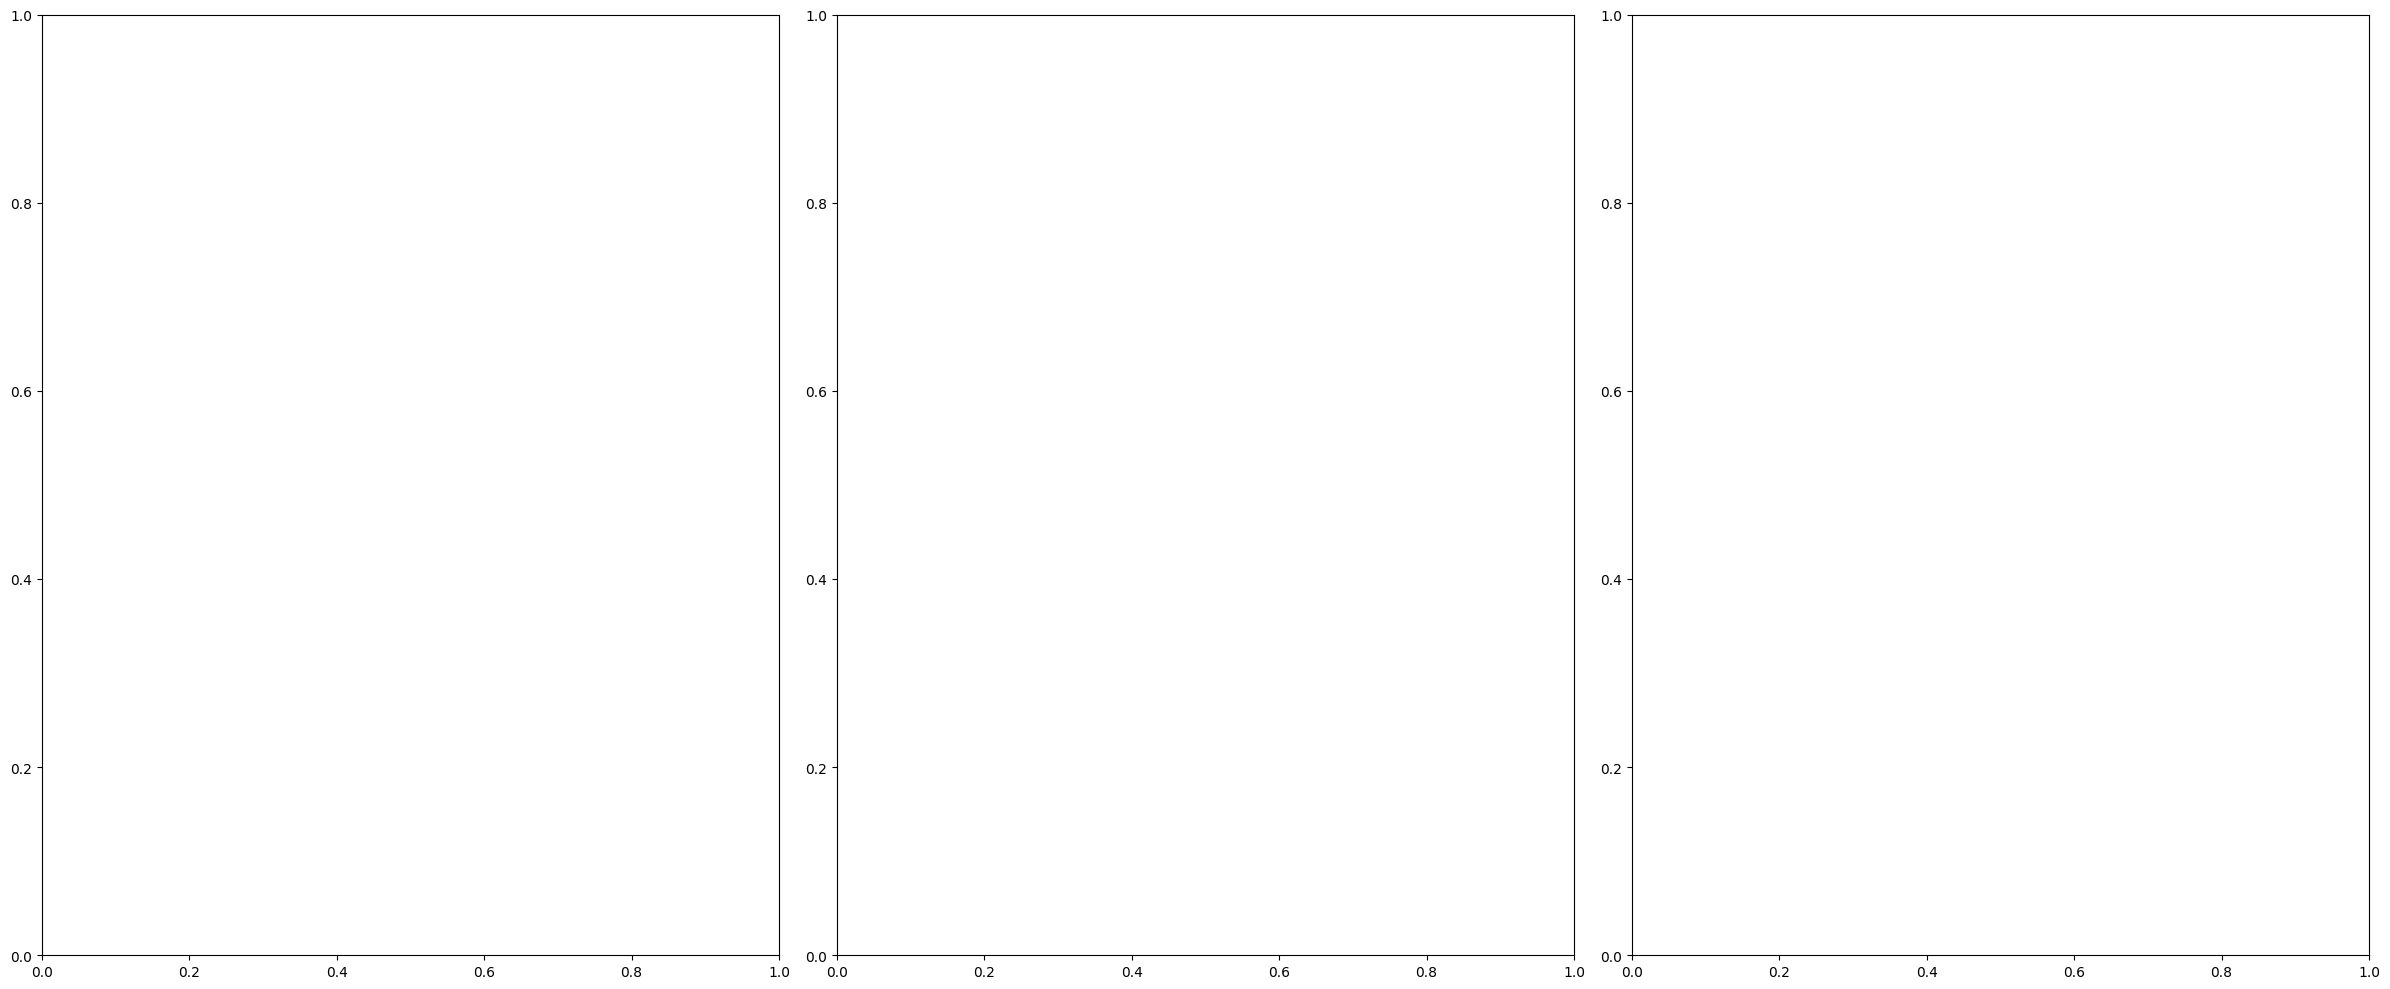

In [316]:
models = [lr, ridge, lasso]
visualize_coefficient(models, columns)

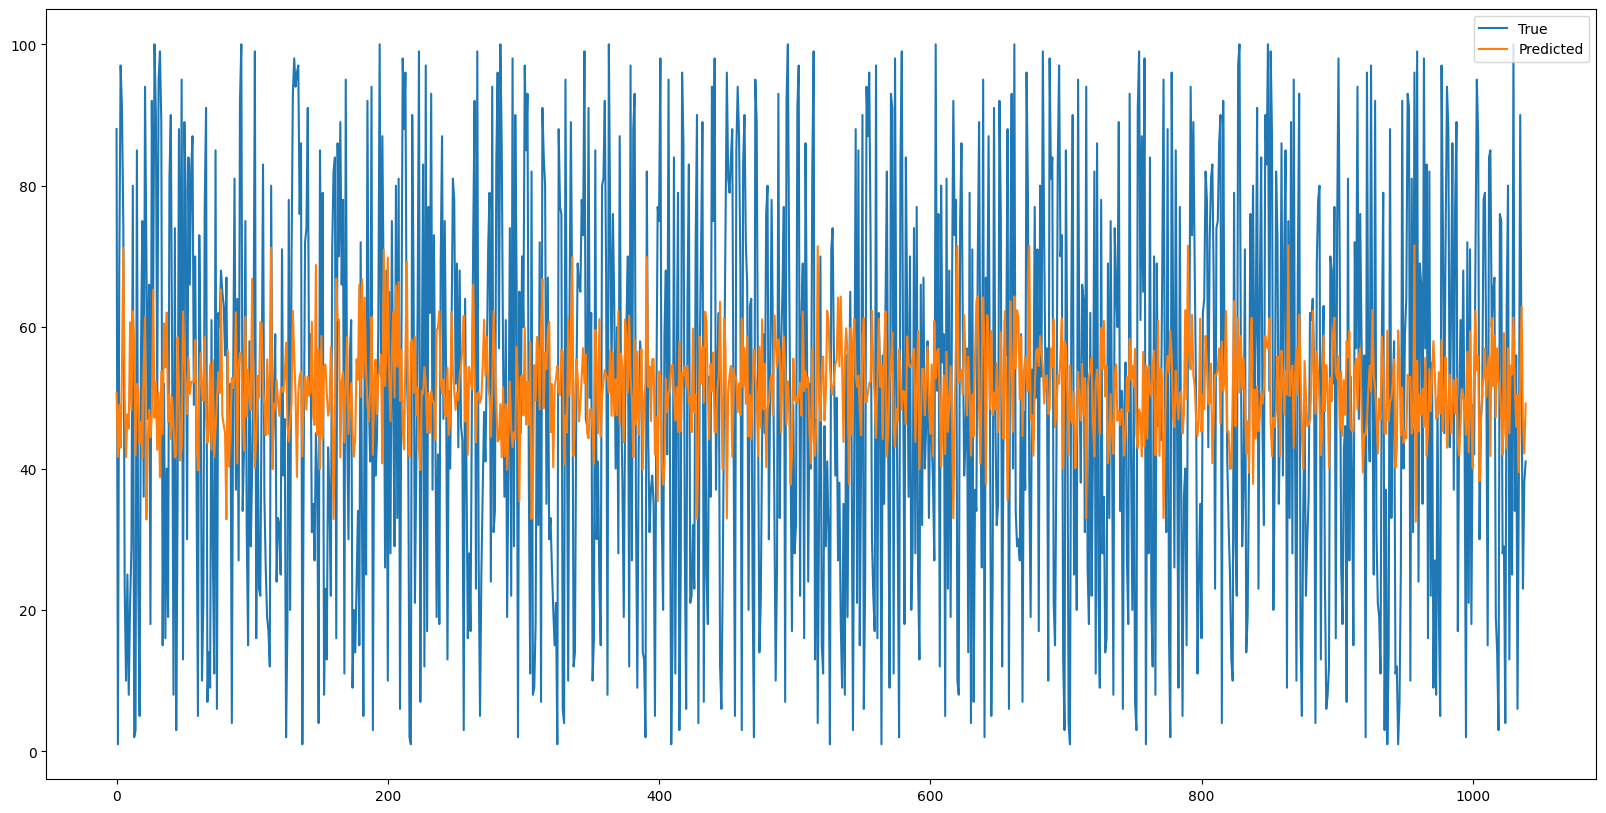

In [237]:
# 원 자료와 예측값의 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(y_test, label='True')

plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [234]:
model.score(X_test, y_test)

-0.027537609511627537

In [235]:
neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-832.48 -806.92 -808.12 -788.89 -865.55]
5 folds의 개별 RMSE scores:  [28.85 28.41 28.43 28.09 29.42]
5 folds의 평균 RMSE: 28.639


In [240]:
from sklearn.model_selection import GridSearchCV

# lr에 대한 하이퍼 파라미터 튜닝
def get_best_params(model, params, X, y):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print(f'{grid_model.best_params_}로 학습한 모델의 평균 RMSE: {rmse:.4f}')
    print(f"최적의 하이퍼 파라미터: {grid_model.best_estimator_}")

In [242]:
params = {'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [1, -1], 'positive': [True, False]}
get_best_params(model, params, X, y)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}로 학습한 모델의 평균 RMSE: 28.6425
최적의 하이퍼 파라미터: LinearRegression(n_jobs=1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Cs = [0.01, 0.1, 1, 5, 10, 100]
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, C in enumerate(Cs):
    lr = LogisticRegression(C=C)
    lr.fit(df_data, df_labels)
    coeff = pd.Series(data=lr.coef_[0], index=df_data.columns)
    colname = f'C: {C}'
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()